# **Разведочный анализ данных (EDA) датасета "ТБ-Город"**  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
link = "C:/Users/User/Desktop/city_clients.csv"

df = pd.read_csv(link)

## **1. Общая информация о датасете**  
### **1.1. Метаданные и структура** 

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 68 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   party_rk                        1000000 non-null  int64  
 1   gorod_client_flg                1000000 non-null  int64  
 2   fuel_gmv                        373971 non-null   float64
 3   fuel_avg_price                  373971 non-null   float64
 4   fuel_n_orders                   373971 non-null   float64
 5   fuel_first_order_date           373971 non-null   object 
 6   fuel_last_order_date            373971 non-null   object 
 7   supermarket_gmv                 105785 non-null   float64
 8   supermarket_avg_price           105785 non-null   float64
 9   supermarket_n_orders            105785 non-null   float64
 10  supermarket_first_order_date    105785 non-null   object 
 11  supermarket_last_order_date     105785 non-null   object 
 12  a

- Датсет содержит **1000000** записей с **68** признаками.  
- Типы данных: числовые (`int64`, `float64`), категориальные (`object`).  
- Из них `float64(58)`, `int64(2)`, `object(8)`

In [161]:
df.isnull().sum()

party_rk                              0
gorod_client_flg                      0
fuel_gmv                         626029
fuel_avg_price                   626029
fuel_n_orders                    626029
                                  ...  
knigi_transactions_cnt            16481
zhivotnye_gmv                     16481
zhivotnye_transactions_cnt        16481
turagentstva_gmv                  16481
turagentstva_transactions_cnt     16481
Length: 68, dtype: int64

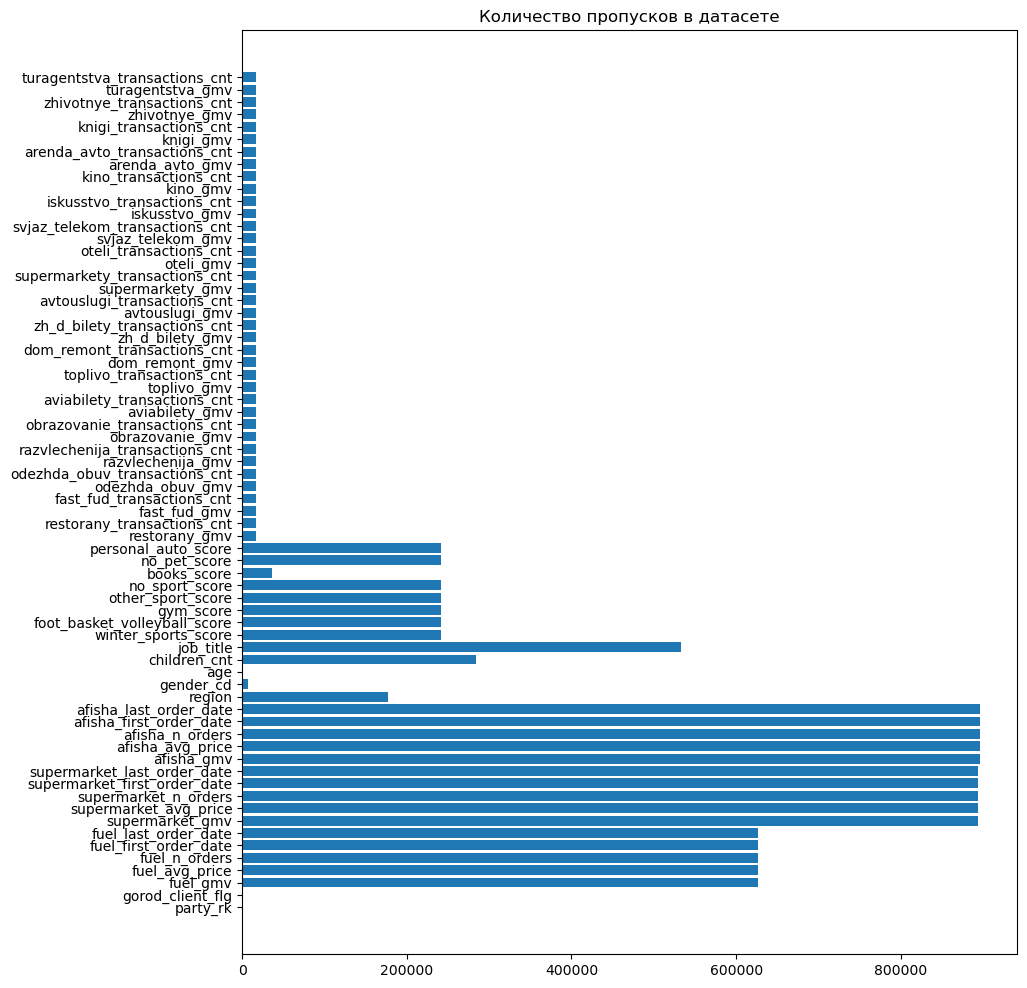

In [9]:
plt.figure(figsize = (10,12))
plt.barh(df.columns.tolist(), df.isnull().sum())
plt.title("Количество пропусков в датасете")
plt.show()

### **1.2. Пример данных** 

In [163]:
df.head(3)

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
0,1002611776,1,1499.06,749.530000,2.0,2023-05-22,2024-07-08,NaN,NaN,NaN,...,798.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0
1,812910044,1,5600.68,1866.893333,3.0,2023-01-12,2024-03-30,NaN,NaN,NaN,...,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0
2,379196768,1,32831.06,1492.320909,22.0,2023-08-12,2024-09-28,3775.76,1887.88,2.0,...,512.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,21680.0,457.0


## **2. Статистический анализ**  
### **2.1. Дескриптивная статистика**  

In [165]:
df.describe()

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,afisha_gmv,afisha_avg_price,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
count,1.000000e+06,1000000.0,3.739710e+05,373971.000000,373971.000000,1.057850e+05,105785.000000,105785.000000,103359.000000,103359.000000,...,983519.000000,983519.000000,9.835190e+05,983519.000000,9.835190e+05,983519.000000,9.835190e+05,983519.000000,9.835190e+05,983519.000000
mean,6.657591e+08,0.5,2.279358e+04,1702.038241,14.430293,1.048409e+04,1886.426710,6.050952,5975.527313,3016.960747,...,181.706634,209.961228,3.116869e+02,209.961228,2.102093e+02,209.961228,3.938231e+02,209.961228,3.900314e+03,209.961228
std,3.220606e+08,0.5,3.239326e+04,822.476137,20.107284,2.436341e+04,1385.987569,12.713711,9852.675529,3562.216163,...,845.036469,218.914151,4.992884e+03,218.914151,3.632981e+03,218.914151,3.757513e+03,218.914151,3.197710e+04,218.914151
min,2.600000e+01,0.0,5.100000e-01,0.510000,1.000000,8.000000e+00,8.000000,1.000000,11.000000,11.000000,...,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
25%,3.696874e+08,0.0,3.665320e+03,1110.895305,2.000000,1.579760e+03,962.607500,1.000000,1100.000000,840.000000,...,0.000000,43.000000,0.000000e+00,43.000000,0.000000e+00,43.000000,0.000000e+00,43.000000,0.000000e+00,43.000000
50%,7.056538e+08,0.5,1.204133e+04,1602.006667,8.000000,3.404880e+03,1537.333333,2.000000,2900.000000,1686.000000,...,0.000000,155.000000,0.000000e+00,155.000000,0.000000e+00,155.000000,0.000000e+00,155.000000,0.000000e+00,155.000000
75%,9.433293e+08,1.0,3.065374e+04,2127.330000,19.000000,8.869610e+03,2407.272500,5.000000,7000.000000,4000.000000,...,0.000000,313.000000,0.000000e+00,313.000000,0.000000e+00,313.000000,0.000000e+00,313.000000,0.000000e+00,313.000000
max,1.301080e+09,1.0,2.912661e+06,39288.000000,1346.000000,1.084905e+06,35804.540000,383.000000,454180.000000,105000.000000,...,362650.000000,29888.000000,1.156844e+06,29888.000000,1.790157e+06,29888.000000,1.576487e+06,29888.000000,4.755822e+06,29888.000000


### **2.2. Анализ пропусков**  

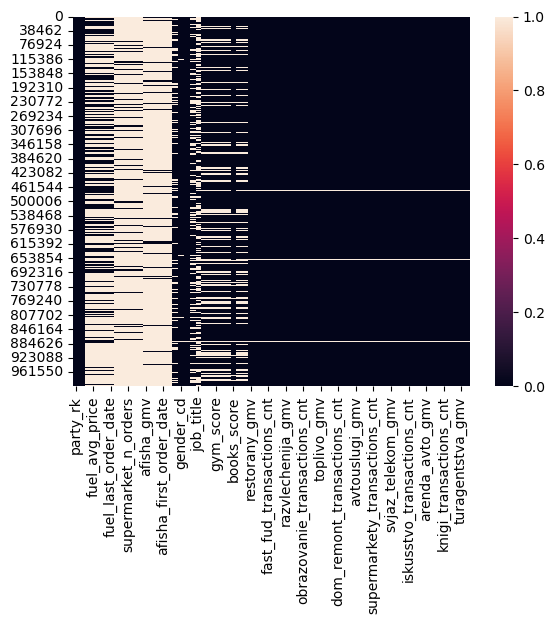

In [177]:
mask = df.isnull()
sns.heatmap(mask)
plt.show()

## **3. Анализ количественных данных**  
### **3.1. Распределения и гистограммы**

In [179]:
df_float64 = df.select_dtypes(include = "float64")
df_float64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   fuel_gmv                        373971 non-null  float64
 1   fuel_avg_price                  373971 non-null  float64
 2   fuel_n_orders                   373971 non-null  float64
 3   supermarket_gmv                 105785 non-null  float64
 4   supermarket_avg_price           105785 non-null  float64
 5   supermarket_n_orders            105785 non-null  float64
 6   afisha_gmv                      103359 non-null  float64
 7   afisha_avg_price                103359 non-null  float64
 8   afisha_n_orders                 103359 non-null  float64
 9   region                          822706 non-null  float64
 10  age                             999703 non-null  float64
 11  children_cnt                    716195 non-null  float64
 12  winter_sports_s

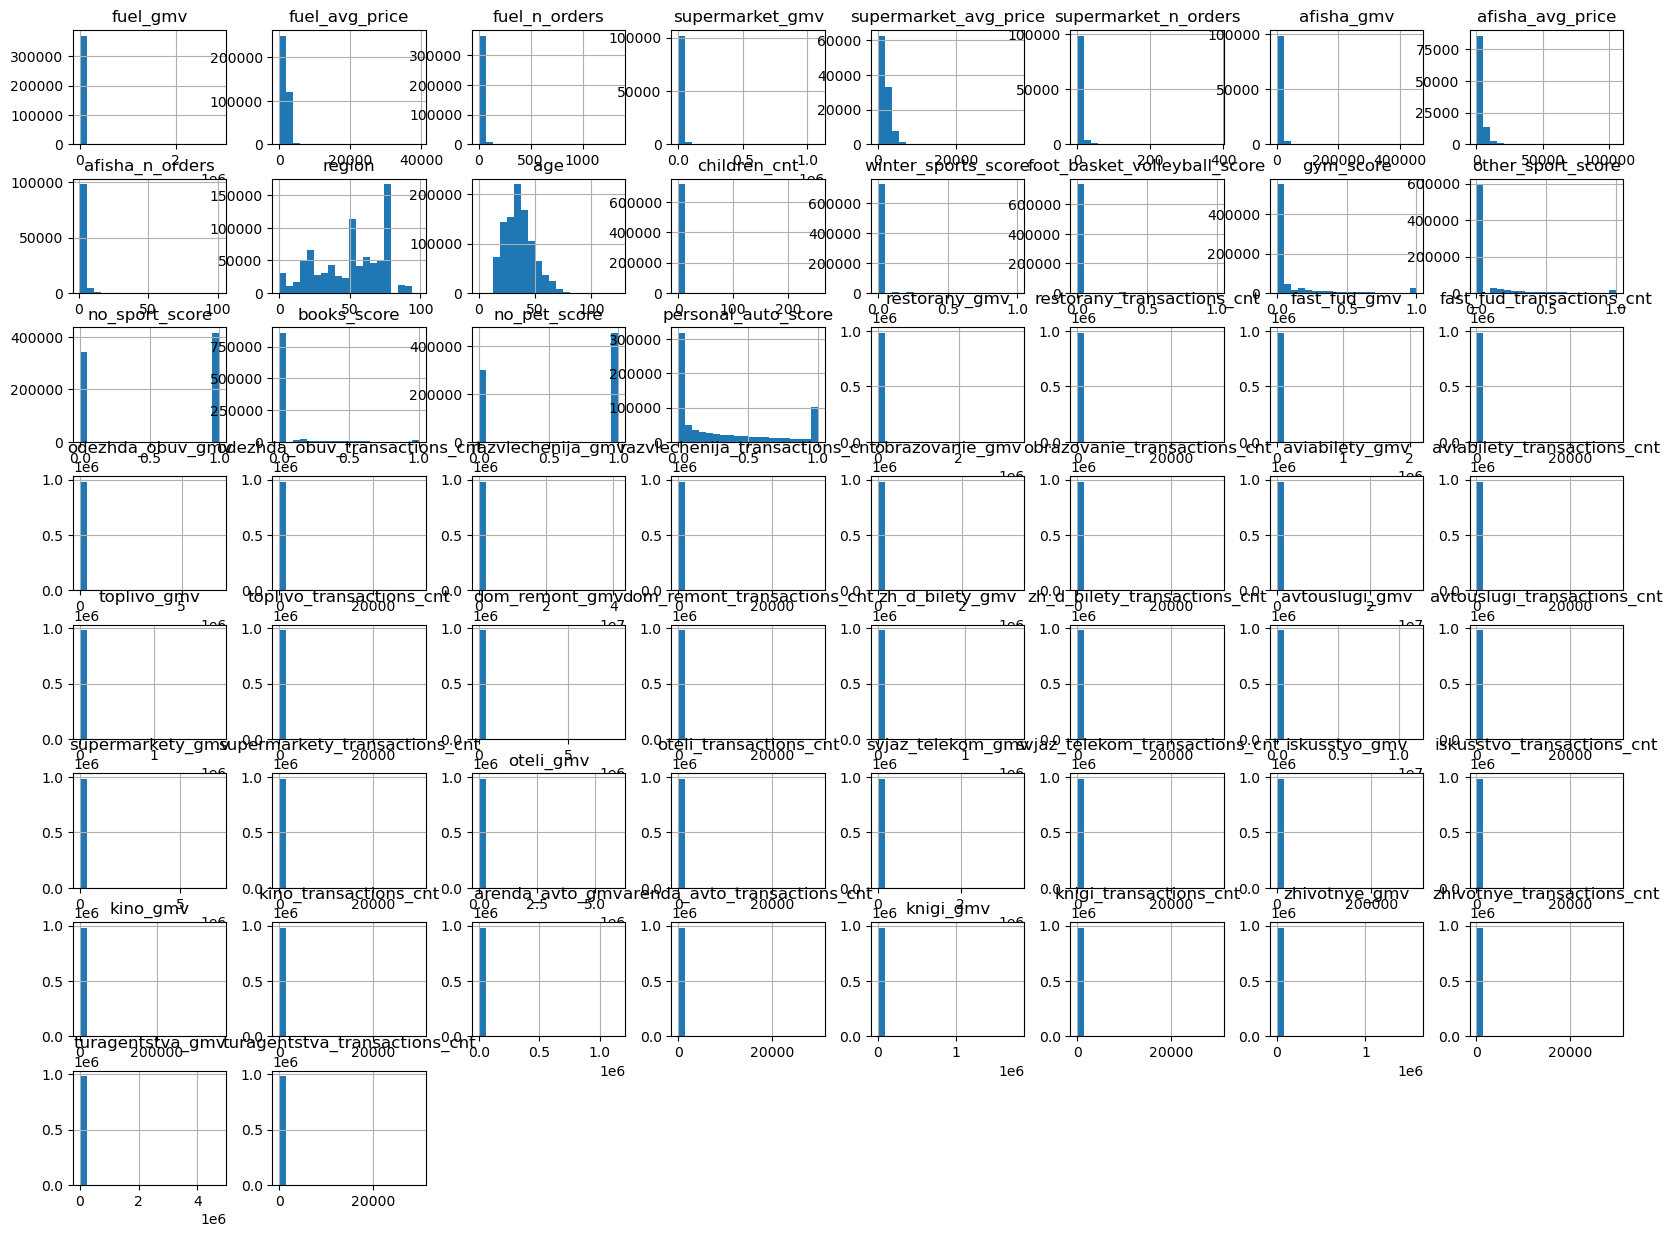

In [180]:
df_float64.hist(bins=20, figsize=(20, 15))
plt.xscale('log')
plt.show()

### **3.2. Потенциальные выбросы (Boxplot)**
### Данные которые выходят за пределы (Q1 - 1.5 * IQR, Q3 + 1.5 IQR)

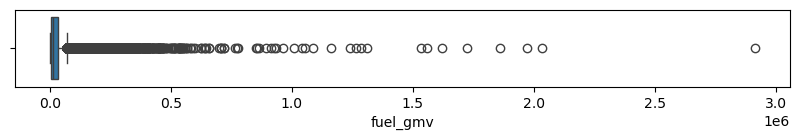

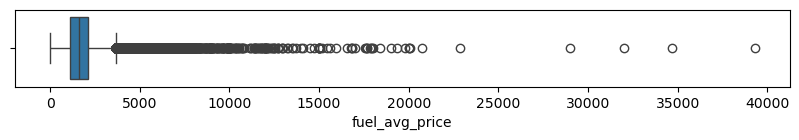

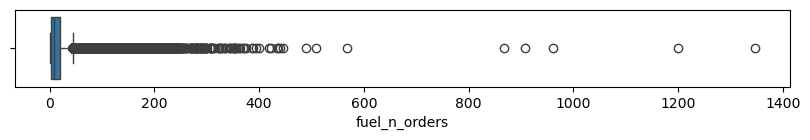

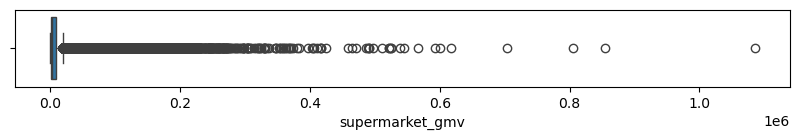

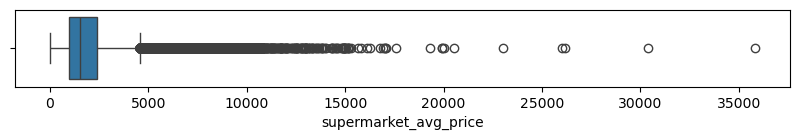

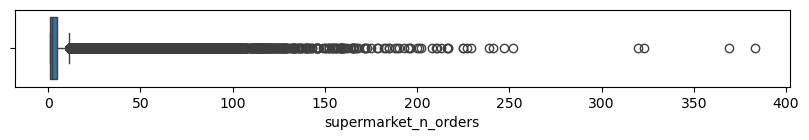

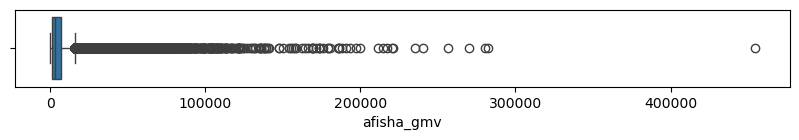

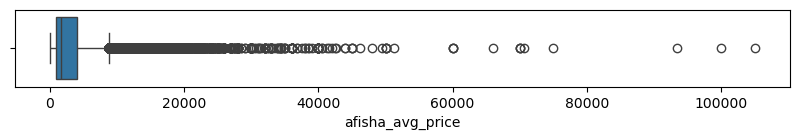

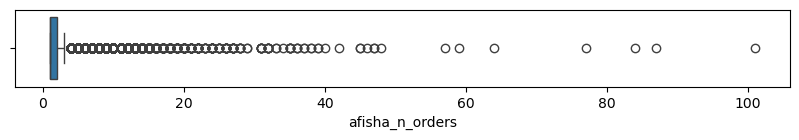

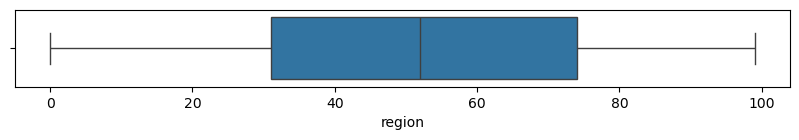

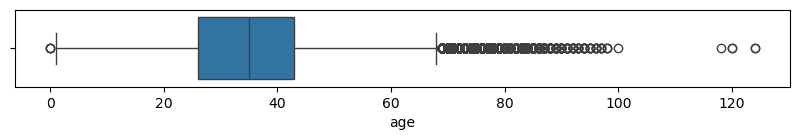

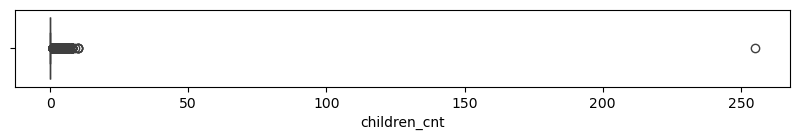

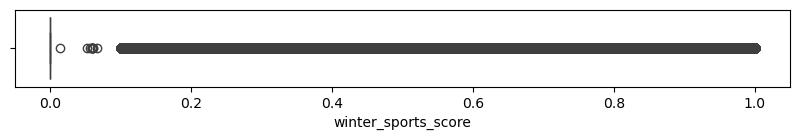

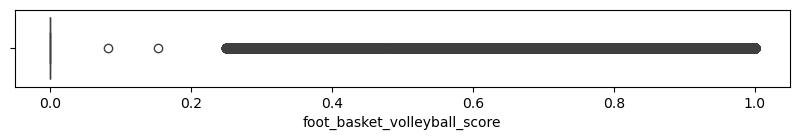

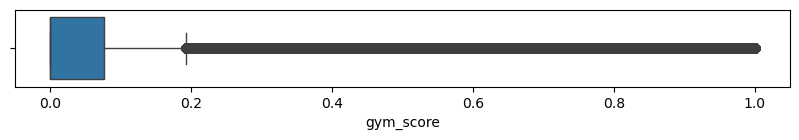

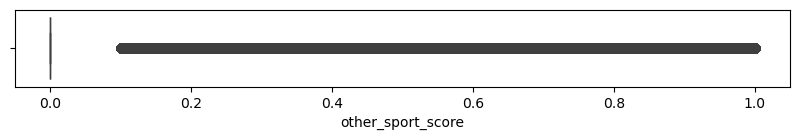

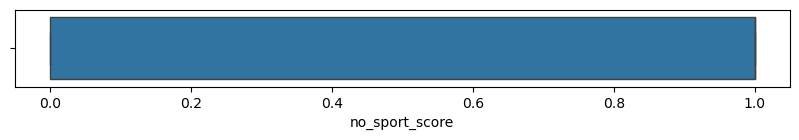

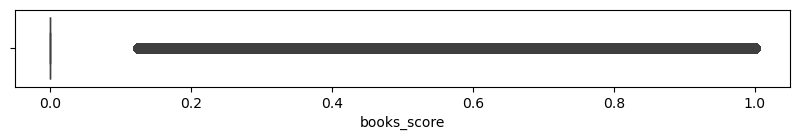

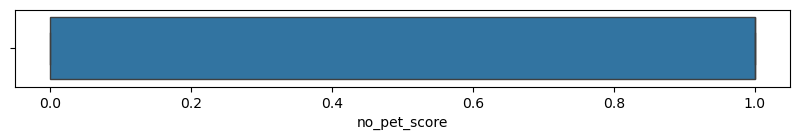

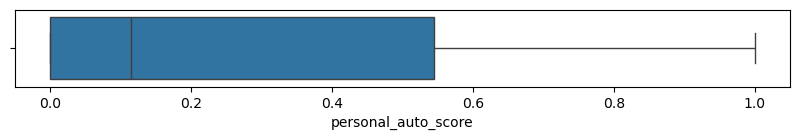

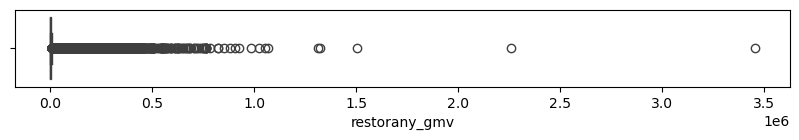

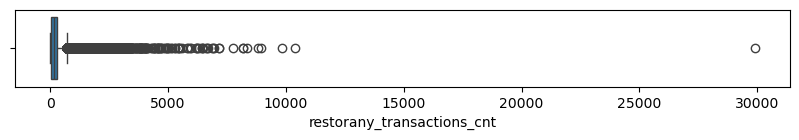

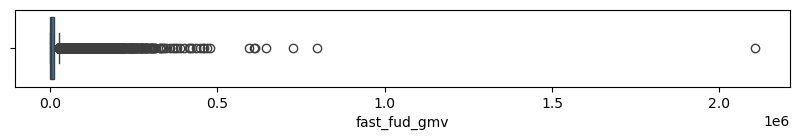

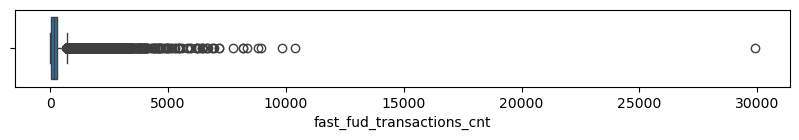

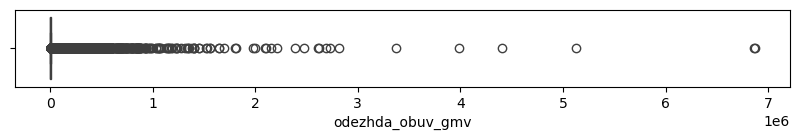

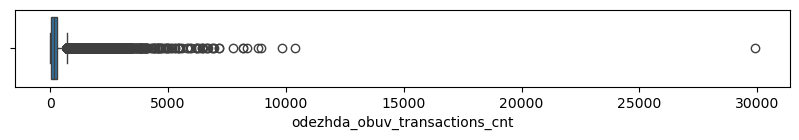

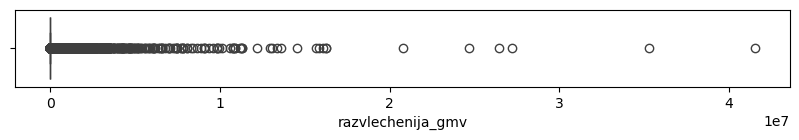

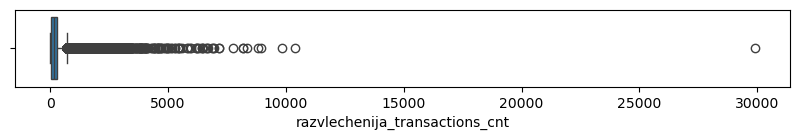

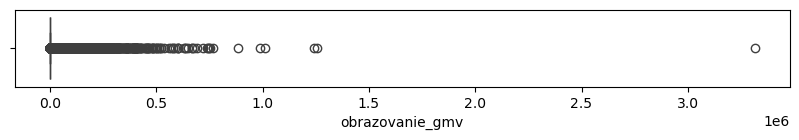

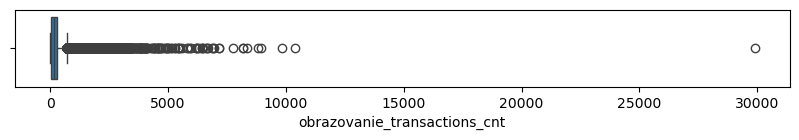

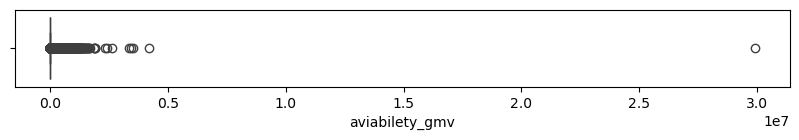

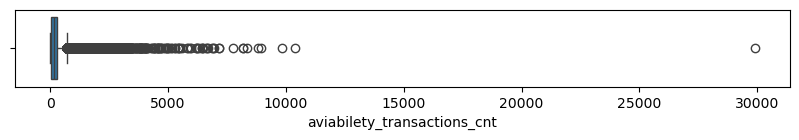

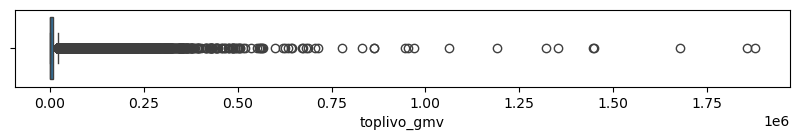

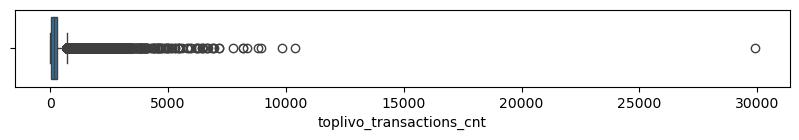

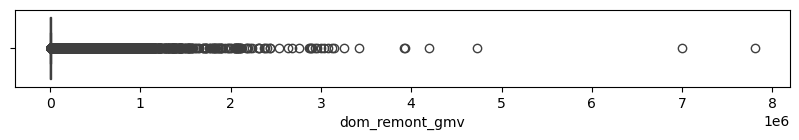

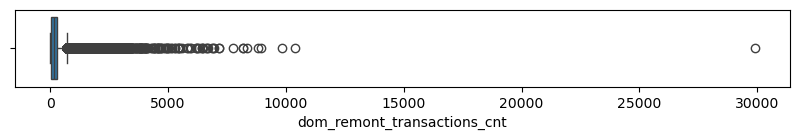

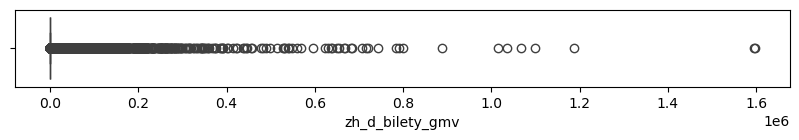

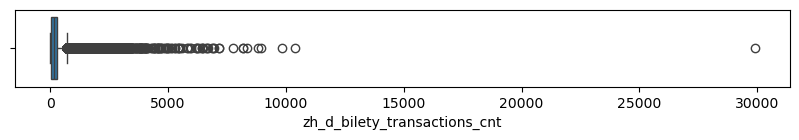

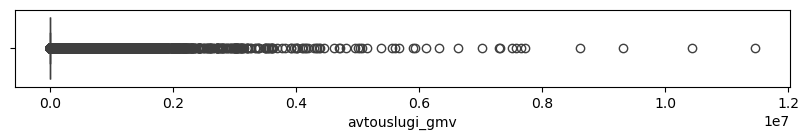

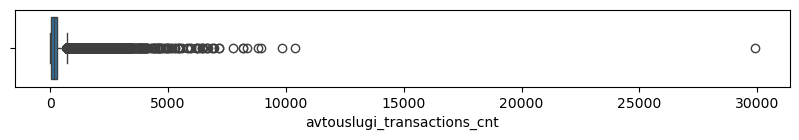

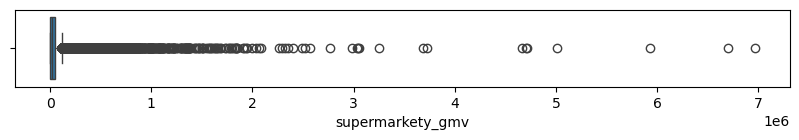

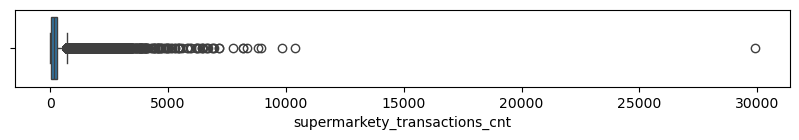

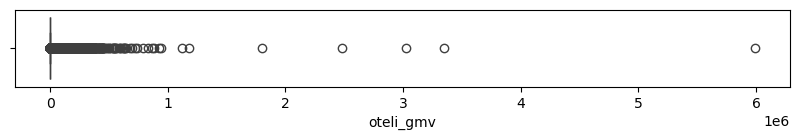

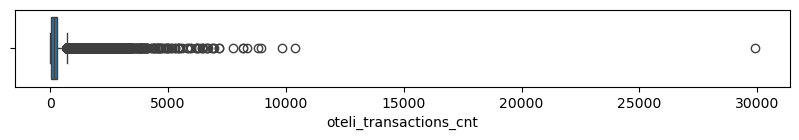

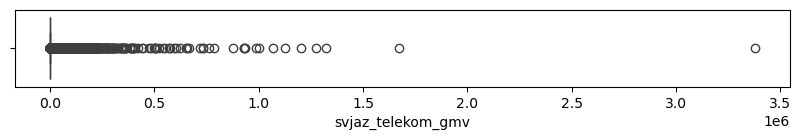

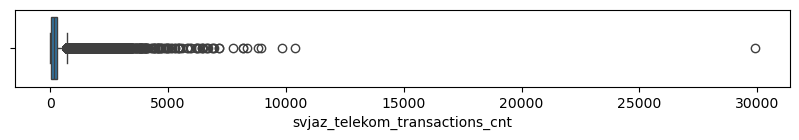

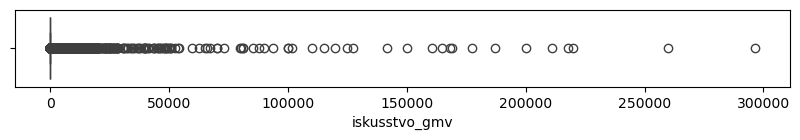

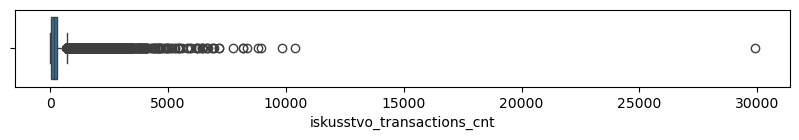

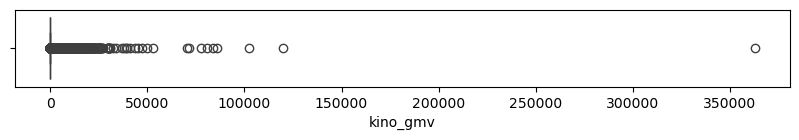

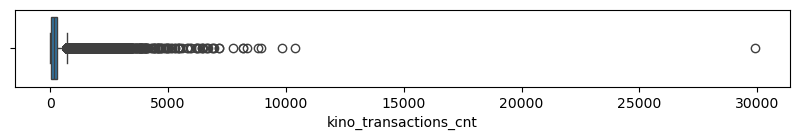

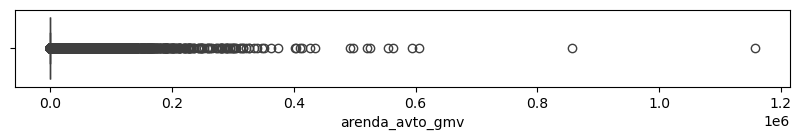

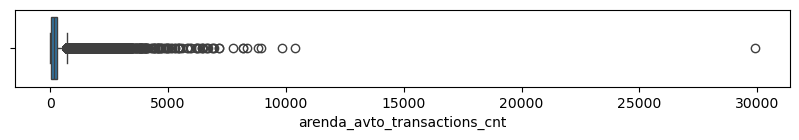

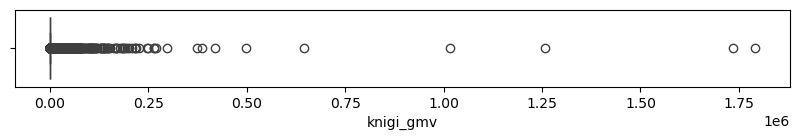

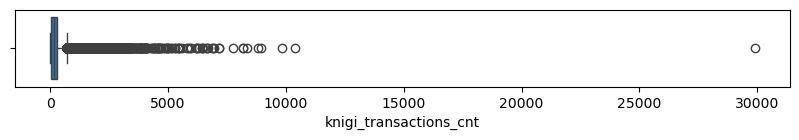

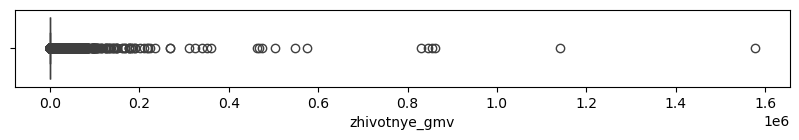

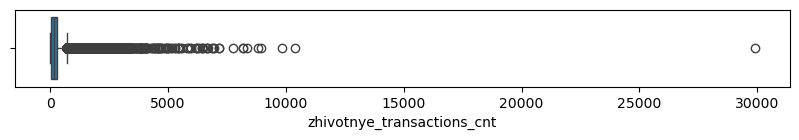

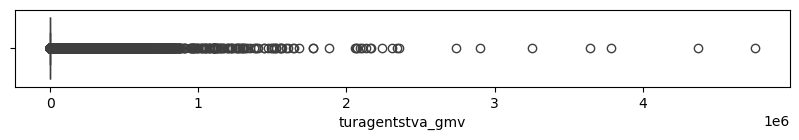

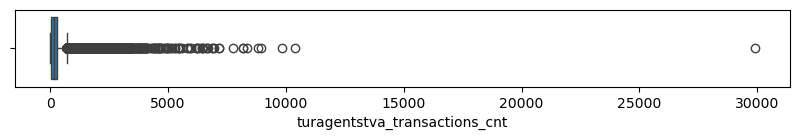

In [195]:
for i in df_float64.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df_float64[i], orient="h")
    plt.show()

In [5]:
# Для каждого числового столбца в DataFrame
numeric_cols = df.select_dtypes(include=["int", "float"]).columns
out = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    out[f"{col}_outlier"] = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
out.sum()

party_rk_outlier                               0
gorod_client_flg_outlier                       0
fuel_gmv_outlier                           23045
fuel_avg_price_outlier                      7255
fuel_n_orders_outlier                      22908
supermarket_gmv_outlier                    12825
supermarket_avg_price_outlier               4706
supermarket_n_orders_outlier               13190
afisha_gmv_outlier                          8665
afisha_avg_price_outlier                    6430
afisha_n_orders_outlier                    13329
region_outlier                                 0
age_outlier                                11263
children_cnt_outlier                       52117
winter_sports_score_outlier                33424
foot_basket_volleyball_score_outlier       23681
gym_score_outlier                         119254
other_sport_score_outlier                 162528
no_sport_score_outlier                         0
books_score_outlier                       106032
no_pet_score_outlier

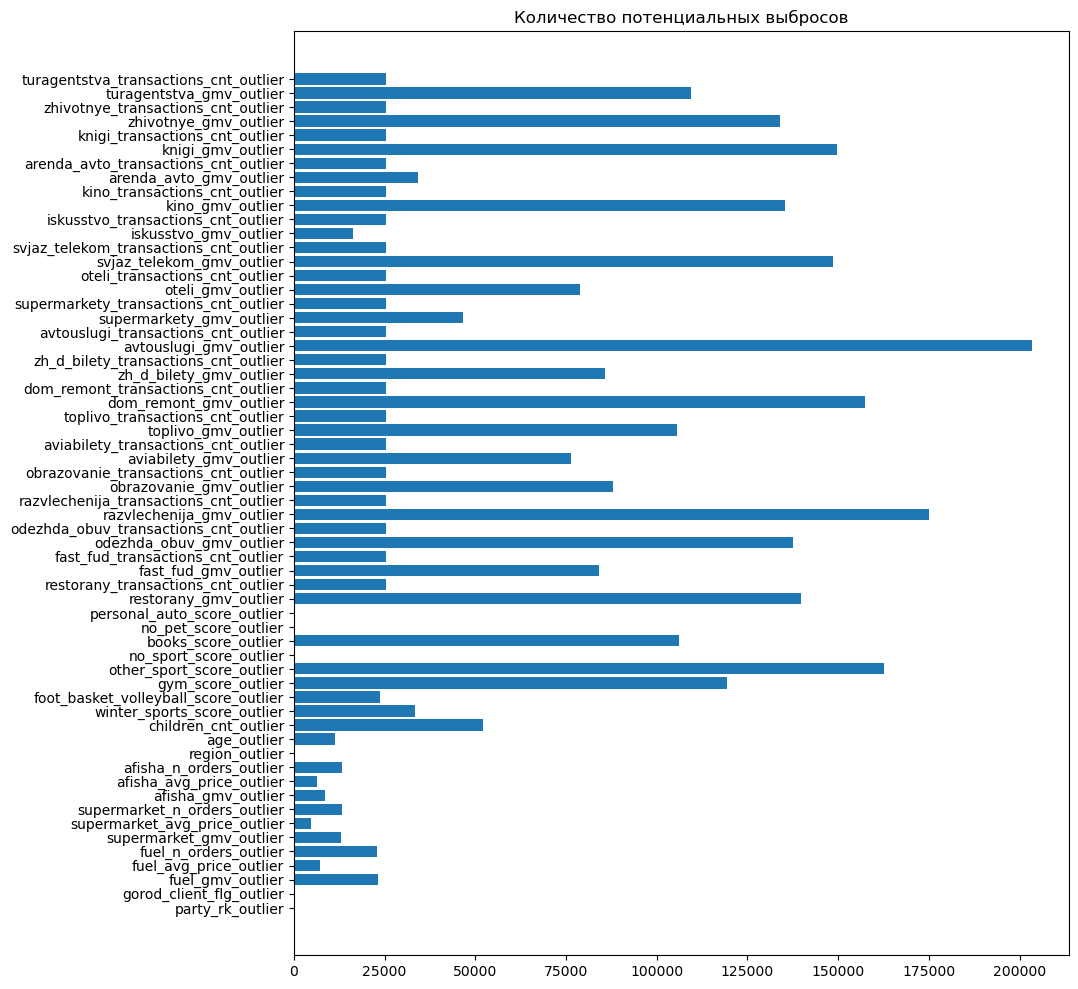

In [6]:
plt.figure(figsize = (10,12))
plt.barh(out.columns.tolist(), out.sum())
plt.title("Количество потенциальных выбросов")
plt.show()

## **4. Анализ категориальных данных**  

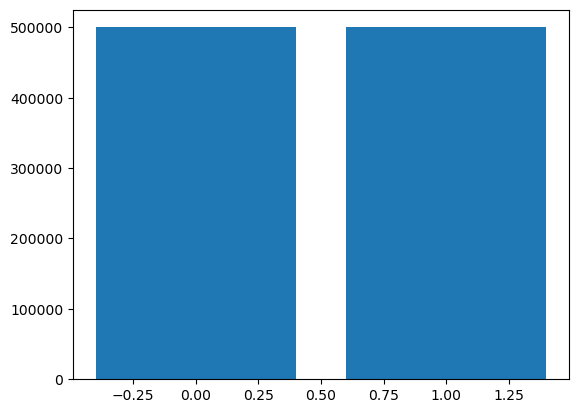

(None,
 gorod_client_flg
 1    500000
 0    500000
 Name: count, dtype: int64)

In [206]:
plt.bar(df[df.columns[1]].unique(), df[df.columns[1]].value_counts())
plt.show(), df[df.columns[1]].value_counts()

## **5. Корреляционный анализ**  
### **5.1. Матрица корреляций (Пирсон)**  

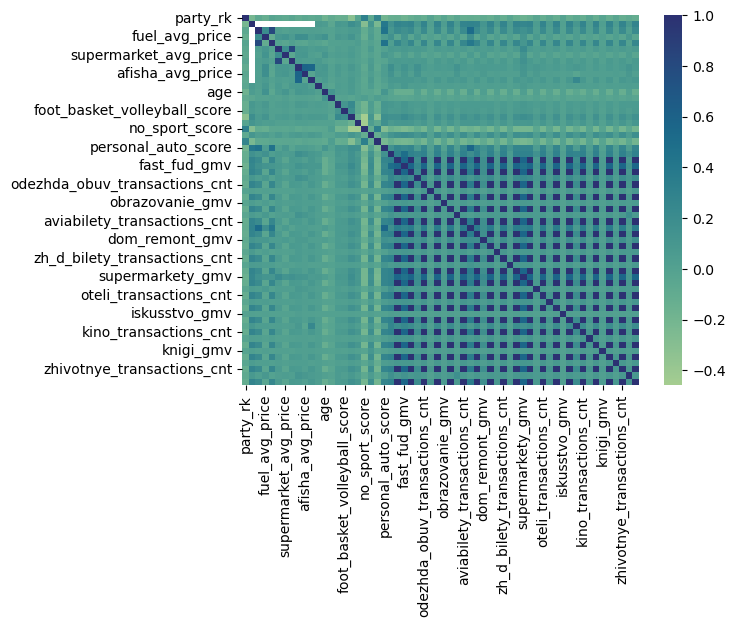

In [204]:
df_num = df.select_dtypes(include = ["float64", "int64"])
corr = df_num.corr()
sns.heatmap(corr, annot=None, cmap = "crest")
plt.show()